# Hypothesis Analysis

In [21]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats
from opioidtools import utils

## Data

In [22]:
gdp_opioid = pd.read_csv('data/gdp_opioid.csv')
gdp_opioid.head()

,Year,Series ID,State,Region Code,GDP_0101,Deaths,Population,Crude Rate,Prescriptions Dispensed by US Retailers in that year (millions)
0,2010,ALNQGSP,Alabama,1,177249.150,194.0,4779736.0,4.1,210.0
1,2011,ALNQGSP,Alabama,1,183916.625,180.0,4802740.0,3.7,219.0
2,2012,ALNQGSP,Alabama,1,189245.525,175.0,4822023.0,3.6,217.0
3,2013,ALNQGSP,Alabama,1,194786.925,175.0,4833722.0,3.6,207.0
4,2014,ALNQGSP,Alabama,1,197406.850,282.0,4849377.0,5.8,196.0


### How significant the differences are in crude rate of the states with various levels of economic development?

### Initial Analysis:

In order to compare the states with different levels of economic development, we decided to use a T-test for the state with the lowest GDP on average from 2010 to 2014, and the state with the highest GDP on average from 2010 to 2014 to see if there is a siginificant difference in the crude rate between the states with different levels of economic development. The assumption we made include the following: 
- large sample size is used
- each state of crude rate and other data relevant to opioid overdose deaths is independent of each other 
- the data collected follows a continuous or ordinal scale
- the data, when plotted, results in a normal distribution, bell-shaped distribution curve

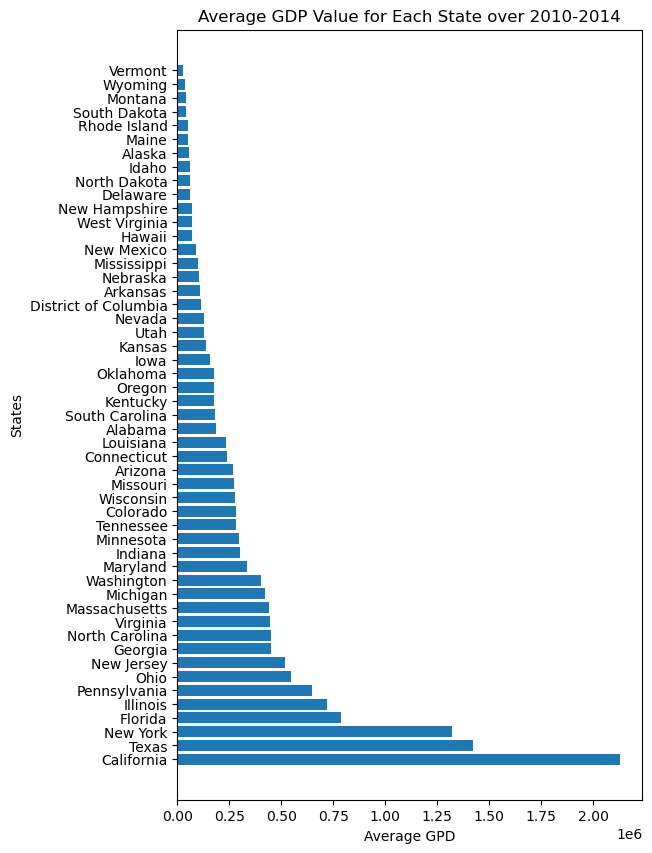

In [23]:
# Copy the merged dataset and use it for the analysis part
gdp_opioid_for_analysis = gdp_opioid

# Convert GDP_0101 column to a numeric data type
gdp_opioid_for_analysis['GDP_0101'] = utils.to_numeric(gdp_opioid_for_analysis, 'GDP_0101')

# Find the average GDP for each state over 2010 to 2014
state_avg_gdp_2010_to_2014 = gdp_opioid_for_analysis.groupby('State')['GDP_0101'].mean()

# Plot

state_avg_gdp_sorted = state_avg_gdp_2010_to_2014.sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(6,10))
plt.barh(state_avg_gdp_sorted.index, state_avg_gdp_sorted.values)
plt.xlabel('Average GPD')
plt.ylabel('States')
plt.title('Average GDP Value for Each State over 2010-2014')
plt.savefig('figures/'+'Avg_GDP_for_Each_State_Over_Years')
plt.show()

Find the minimum, median, and maximum avg GDP among states over 2010 to 2014:

In [28]:
#Find the Minimum, Median, and Maximum avg GDP among states over 2010 to 2014
median_gdp = state_avg_gdp_2010_to_2014.median()
median_gdp_states = state_avg_gdp_2010_to_2014[state_avg_gdp_2010_to_2014.eq(median_gdp)].index.tolist()

min_gdp = state_avg_gdp_2010_to_2014.min()
min_gdp_states = state_avg_gdp_2010_to_2014[state_avg_gdp_2010_to_2014.eq(min_gdp)].index.tolist()

max_gdp = state_avg_gdp_2010_to_2014.max()
max_gdp_states = state_avg_gdp_2010_to_2014[state_avg_gdp_2010_to_2014.eq(max_gdp)].index.tolist()

# Print the results
print(f"Minimum: {min_gdp:.2f} " f"State: {', '.join(min_gdp_states)}")
print(f"Median: {median_gdp:.2f} " f"State: {', '.join(median_gdp_states)}")
print(f"Maximum: {max_gdp:.2f} " f"State: {', '.join(max_gdp_states)}")

Minimum: 28891.08 State: Vermont
Median: 178983.00 State: South Carolina
Maximum: 2129273.11 State: California


Visualization of the Highest Average GDP State and the Lowest Average GDP State:

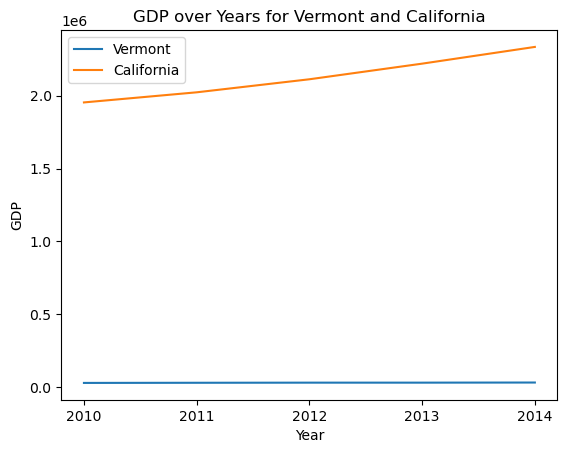

In [29]:
# Select the two states to plot plotting
gdp_state1 = gdp_opioid[(gdp_opioid["State"] == "Vermont")][["Year", "GDP_0101"]]
gdp_state2 = gdp_opioid[(gdp_opioid["State"] == "California")][["Year", "GDP_0101"]]

# Create a line plot of the GDP over years for the two states
plt.plot(gdp_state1["Year"], gdp_state1["GDP_0101"], label= "Vermont")
plt.plot(gdp_state2["Year"], gdp_state2["GDP_0101"], label= "California")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("GDP over Years for {} and {}".format("Vermont", "California"))

# x ticks format
years = gdp_opioid["Year"].unique()
plt.xticks(list(range(int(years.min()), int(years.max())+1)))

plt.legend()
plt.savefig('figures/'+'Two_Avg_GDP_States')
plt.show()

#### Hypothesis Testing: Highest average GDP state vs. Lowest average GDP state:

$ H0 $ = There is no significant difference in the crude rate between California and Vermont. 

$ H1 $ = There is a significant difference in the crude rate between California and Vermont.

In [30]:
#T test for Crude Rate between two states
t_stat, p_value = scipy.stats.ttest_ind(gdp_opioid[gdp_opioid['State']== "Vermont"]['Crude Rate'],
                 gdp_opioid[gdp_opioid['State']== "California"]['Crude Rate'],
                 axis=0)
# Print results
print("T-statistic:", t_stat)
print("p-value:", p_value)

T-statistic: 5.145630229646416
p-value: 0.0008790286706211422


#### Rough Conclusion: 
The mean crude rate of California is significantly lower than the mean crude rate of Vermont, which indicates that the state with high GDP might have the lower crude rate than the state with low GDP. However, this is not strong and objective enough since it's just the comparation between two states. 

### Extended Analysis:
In the above analysis, there are only two states (the highest and the lowest average GDP over 2010 to 2014) were compared. In the following process, we are going to split the states into two parts, one is the states with the higher average GDP, the other one is the states with the lower average GDP. We will conduct the t-test to compare the mean values of the "Crude Rate" between these two parts to see if there is a significant diffference.

#### Hypothesis Testing: High average GDP states vs. Low average GDP states

$ H0 $ = There is no significant difference in the crude rate between the states with high average GDP and the states with lower average GDP

$ H1 $ = There is a significant difference in the crude rate between the states with high average GDP and the states with lower average GDP


In [31]:
# Calculate the average GDP for each state over 2010 to 2014
state_avg_gdp_2010_to_2014 = gdp_opioid_for_analysis.groupby('State')['GDP_0101'].mean()

# Filter out the high avg GDP and low avg GDP states (> or < than the median)
median_gdp = state_avg_gdp_2010_to_2014.median()
high_gdp_states = state_avg_gdp_2010_to_2014[state_avg_gdp_2010_to_2014 >= median_gdp].index
low_gdp_states = state_avg_gdp_2010_to_2014[state_avg_gdp_2010_to_2014 < median_gdp].index
high_low_gdp = gdp_opioid_for_analysis[gdp_opioid_for_analysis['State'].isin(high_gdp_states.union(low_gdp_states))]

# Obtain the crude rate from high and low avg GDP from states.
high_gdp_crude_rate = high_low_gdp.loc[high_low_gdp['State'].isin(high_gdp_states), 'Crude Rate']
low_gdp_crude_rate = high_low_gdp.loc[high_low_gdp['State'].isin(low_gdp_states), 'Crude Rate']

# T-test
t_stat_for_two_groups_states, p_value_for_two_groups_states = scipy.stats.ttest_ind(high_gdp_crude_rate, low_gdp_crude_rate)

# Print results
print("T-statistic:", t_stat_for_two_groups_states)
print("p-value:", p_value_for_two_groups_states)

T-statistic: -3.5543687730571776
p-value: 0.0004532330883314629


### Final Conclusion:
We found a T-statistic of -3.55 and a p-value of 0.00045 based on the output. The p-value is less than 0.05, which indicates that we reject the null hypothesis that there is no significant difference in the crude rate between the states with high average GDP and the states with lower average GDP. 

Therefore, we concluded that there is a statistically significant difference in the crude rate between these two groups of states. The t-statistic indicates that the crude rate of the states with higher average GDP is higher than the states with lower average GDP.